In [6]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

def authenticate_twitter():
    """Authenticate with Twitter API"""
    BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAOxQygEAAAAAVlnBKqemQfEcCVQv6BlwrksBTjA%3DHE4xzPYovbBGssTLnwvEFyVf6EWOAVtb2TLnpR3Y1MDSsLE8QF"
    return tweepy.Client(bearer_token=BEARER_TOKEN)

def fetch_tweets_with_retry(client, query, max_tweets=100, wait_time=900):
    """
    Fetch tweets with rate limit handling
    
    Args:
        client: Tweepy client object
        query: Search query string
        max_tweets: Maximum number of tweets to fetch
        wait_time: Time to wait in seconds when rate limit is hit
    """
    tweets_list = []
    
    try:
        # Fetch tweets in smaller batches to avoid rate limits
        batch_size = min(max_tweets, 10)  # Start with smaller batches
        
        while len(tweets_list) < max_tweets:
            try:
                tweets = client.search_recent_tweets(
                    query=query,
                    max_results=batch_size,
                    tweet_fields=["created_at", "text"]
                )
                
                if not tweets.data:
                    break
                    
                tweets_list.extend(tweets.data)
                print(f"Fetched {len(tweets_list)} tweets so far...")
                
                # Small pause between requests
                time.sleep(2)
                
            except tweepy.TooManyRequests:
                print(f"Rate limit reached. Waiting {wait_time/60} minutes...")
                time.sleep(wait_time)
                continue
                
            except Exception as e:
                print(f"Error occurred: {str(e)}")
                break
    
    except Exception as e:
        print(f"Error in tweet fetching: {str(e)}")
    
    return tweets_list

def analyze_sentiment(text):
    """Analyze sentiment of text using TextBlob"""
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

def categorize_sentiment(score):
    """Categorize sentiment score"""
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

def create_visualization(df):
    """Create and save sentiment visualization"""
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    ax = sns.countplot(x="Sentiment_Category", data=df, palette="Set2")
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom')
    
    plt.title("Sentiment Analysis of Tweets")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Number of Tweets")
    
    # Save the plot
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plt.savefig(f'sentiment_analysis_{timestamp}.png')
    plt.close()

def main():
    # Initialize Twitter client
    client = authenticate_twitter()
    
    # Set up parameters
    query = "climate change -is:retweet lang:en"  # English tweets only, no retweets
    max_tweets = 100
    
    # Fetch tweets
    print("Fetching tweets...")
    tweets = fetch_tweets_with_retry(client, query, max_tweets)
    
    if not tweets:
        print("No tweets were fetched. Exiting...")
        return
    
    # Create DataFrame
    print("Analyzing sentiments...")
    df = pd.DataFrame({
        "Tweet": [tweet.text for tweet in tweets],
        "Created_at": [tweet.created_at for tweet in tweets]
    })
    
    # Analyze sentiments
    df["Sentiment"] = df["Tweet"].apply(analyze_sentiment)
    df["Sentiment_Category"] = df["Sentiment"].apply(categorize_sentiment)
    
    # Create visualization
    print("Creating visualization...")
    create_visualization(df)
    
    # Save results
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_file = f'twitter_sentiment_analysis_{timestamp}.csv'
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")
    
    # Print summary
    print("\nSentiment Analysis Summary:")
    print(df["Sentiment_Category"].value_counts())

if __name__ == "__main__":
    main()

Fetching tweets...
Rate limit reached. Waiting 15.0 minutes...
Fetched 10 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 20 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 30 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 40 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 50 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 60 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 70 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 80 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 90 tweets so far...
Rate limit reached. Waiting 15.0 minutes...
Fetched 100 tweets so far...
Analyzing sentiments...
Creating visualization...
Results saved to twitter_sentiment_analysis_20250129_234738.csv

Sentiment Analysis Summary:
Sentiment_Category
Positive    44
Neutral     29
Negative    27
Name: count, dtype: int64


/var/folders/_j/y2bmb3f57vv3ngw1nfzqs_zr0000gn/T/ipykernel_4907/4195517580.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Sentiment_Category", data=df, palette="Set2")


In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('twitter_sentiment_analysis_20250129_234738.csv')

# View the first few rows
print(df.head())

# If you want to see all the data
print(df)

# If you want to see specific columns
print(df[['Tweet', 'Sentiment_Category']])

# If you want to export it to Excel instead
df.to_excel('twitter_sentiment_analysis.xlsx', index=False)

                                               Tweet  \
0  You have done nothing for climate change, agai...   
1  @Texasbrn Newsflash: Texas is also affected by...   
2  Senator Warren you are going to make a commitm...   
3  Sing for Soil, Dance for Soil, Ride for Soil, ...   
4                 @ABC Mystery? It’s climate change.   

                  Created_at  Sentiment Sentiment_Category  
0  2025-01-29 20:31:06+00:00  -0.016667           Negative  
1  2025-01-29 20:31:03+00:00   0.000000            Neutral  
2  2025-01-29 20:31:00+00:00   0.138889           Positive  
3  2025-01-29 20:30:58+00:00   1.000000           Positive  
4  2025-01-29 20:30:49+00:00   0.000000            Neutral  
                                                Tweet  \
0   You have done nothing for climate change, agai...   
1   @Texasbrn Newsflash: Texas is also affected by...   
2   Senator Warren you are going to make a commitm...   
3   Sing for Soil, Dance for Soil, Ride for Soil, ...   
4           

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download all required NLTK data
def download_nltk_resources():
    """Download required NLTK resources"""
    resources = ['punkt', 'stopwords', 'averaged_perceptron_tagger']
    for resource in resources:
        try:
            nltk.download(resource, quiet=True)
        except Exception as e:
            print(f"Error downloading {resource}: {str(e)}")

# Download resources before proceeding
download_nltk_resources()

def clean_text(text):
    """Clean and preprocess text"""
    # Convert to lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

def get_word_frequencies(texts):
    """Get word frequencies from a list of texts"""
    # Get stopwords
    try:
        stop_words = set(stopwords.words('english'))
    except:
        # Fallback to a basic set of stopwords if NLTK fails
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'is', 'are'}
    
    additional_stops = {'rt', 'via', 'amp', 'climate', 'change'}
    stop_words.update(additional_stops)
    
    # Combine all texts and split into words (simplified tokenization)
    words = []
    for text in texts:
        clean = clean_text(text)
        # Use simple split if NLTK tokenizer fails
        try:
            tokens = word_tokenize(clean)
        except:
            tokens = clean.split()
        
        words.extend([word for word in tokens 
                     if word not in stop_words 
                     and len(word) > 2 
                     and not word.isspace()])
    
    return Counter(words)

def create_wordcloud(word_freq, title, color):
    """Create and return a word cloud"""
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap=color,
        max_words=50,
        min_font_size=10,
        max_font_size=150
    ).generate_from_frequencies(word_freq)
    
    return wordcloud

def plot_word_clouds(df):
    """Create and save word clouds for positive and negative sentiments"""
    # Split tweets by sentiment
    positive_tweets = df[df['Sentiment_Category'] == 'Positive']['Tweet']
    negative_tweets = df[df['Sentiment_Category'] == 'Negative']['Tweet']
    
    # Get word frequencies
    positive_freq = get_word_frequencies(positive_tweets)
    negative_freq = get_word_frequencies(negative_tweets)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot positive word cloud
    pos_cloud = create_wordcloud(positive_freq, "Positive Sentiment Words", 'YlOrRd')
    ax1.imshow(pos_cloud)
    ax1.set_title("Most Common Words in Positive Tweets", fontsize=16, pad=20)
    ax1.axis('off')
    
    # Plot negative word cloud
    neg_cloud = create_wordcloud(negative_freq, "Negative Sentiment Words", 'RdGy')
    ax2.imshow(neg_cloud)
    ax2.set_title("Most Common Words in Negative Tweets", fontsize=16, pad=20)
    ax2.axis('off')
    
    plt.tight_layout(pad=3.0)
    plt.savefig('sentiment_wordcloud.png', bbox_inches='tight', dpi=300)
    plt.close()
    
    return positive_freq, negative_freq

def print_top_words(pos_freq, neg_freq, n=10):
    """Print top n most frequent words for each sentiment"""
    print("\nTop Positive Words:")
    print("-----------------")
    for word, count in pos_freq.most_common(n):
        print(f"{word}: {count}")
    
    print("\nTop Negative Words:")
    print("-----------------")
    for word, count in neg_freq.most_common(n):
        print(f"{word}: {count}")

def main():
    try:
        # Read the CSV file
        df = pd.read_csv('twitter_sentiment_analysis_20250129_234738.csv')
        
        # Create word clouds and get word frequencies
        pos_freq, neg_freq = plot_word_clouds(df)
        
        # Print top words
        print_top_words(pos_freq, neg_freq)
        
        print("\nVisualization has been saved as 'sentiment_wordcloud.png'")
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please ensure you have installed all required packages:")
        print("pip install nltk wordcloud pandas matplotlib seaborn")

if __name__ == "__main__":
    main()


Top Positive Words:
-----------------
people: 7
soil: 5
new: 5
weather: 5
make: 4
know: 4
much: 4
like: 4
good: 4
trump: 4

Top Negative Words:
-----------------
trump: 3
political: 3
muh: 3
nothing: 2
ive: 2
trying: 2
also: 2
environmental: 2
left: 2
oil: 2

Visualization has been saved as 'sentiment_wordcloud.png'


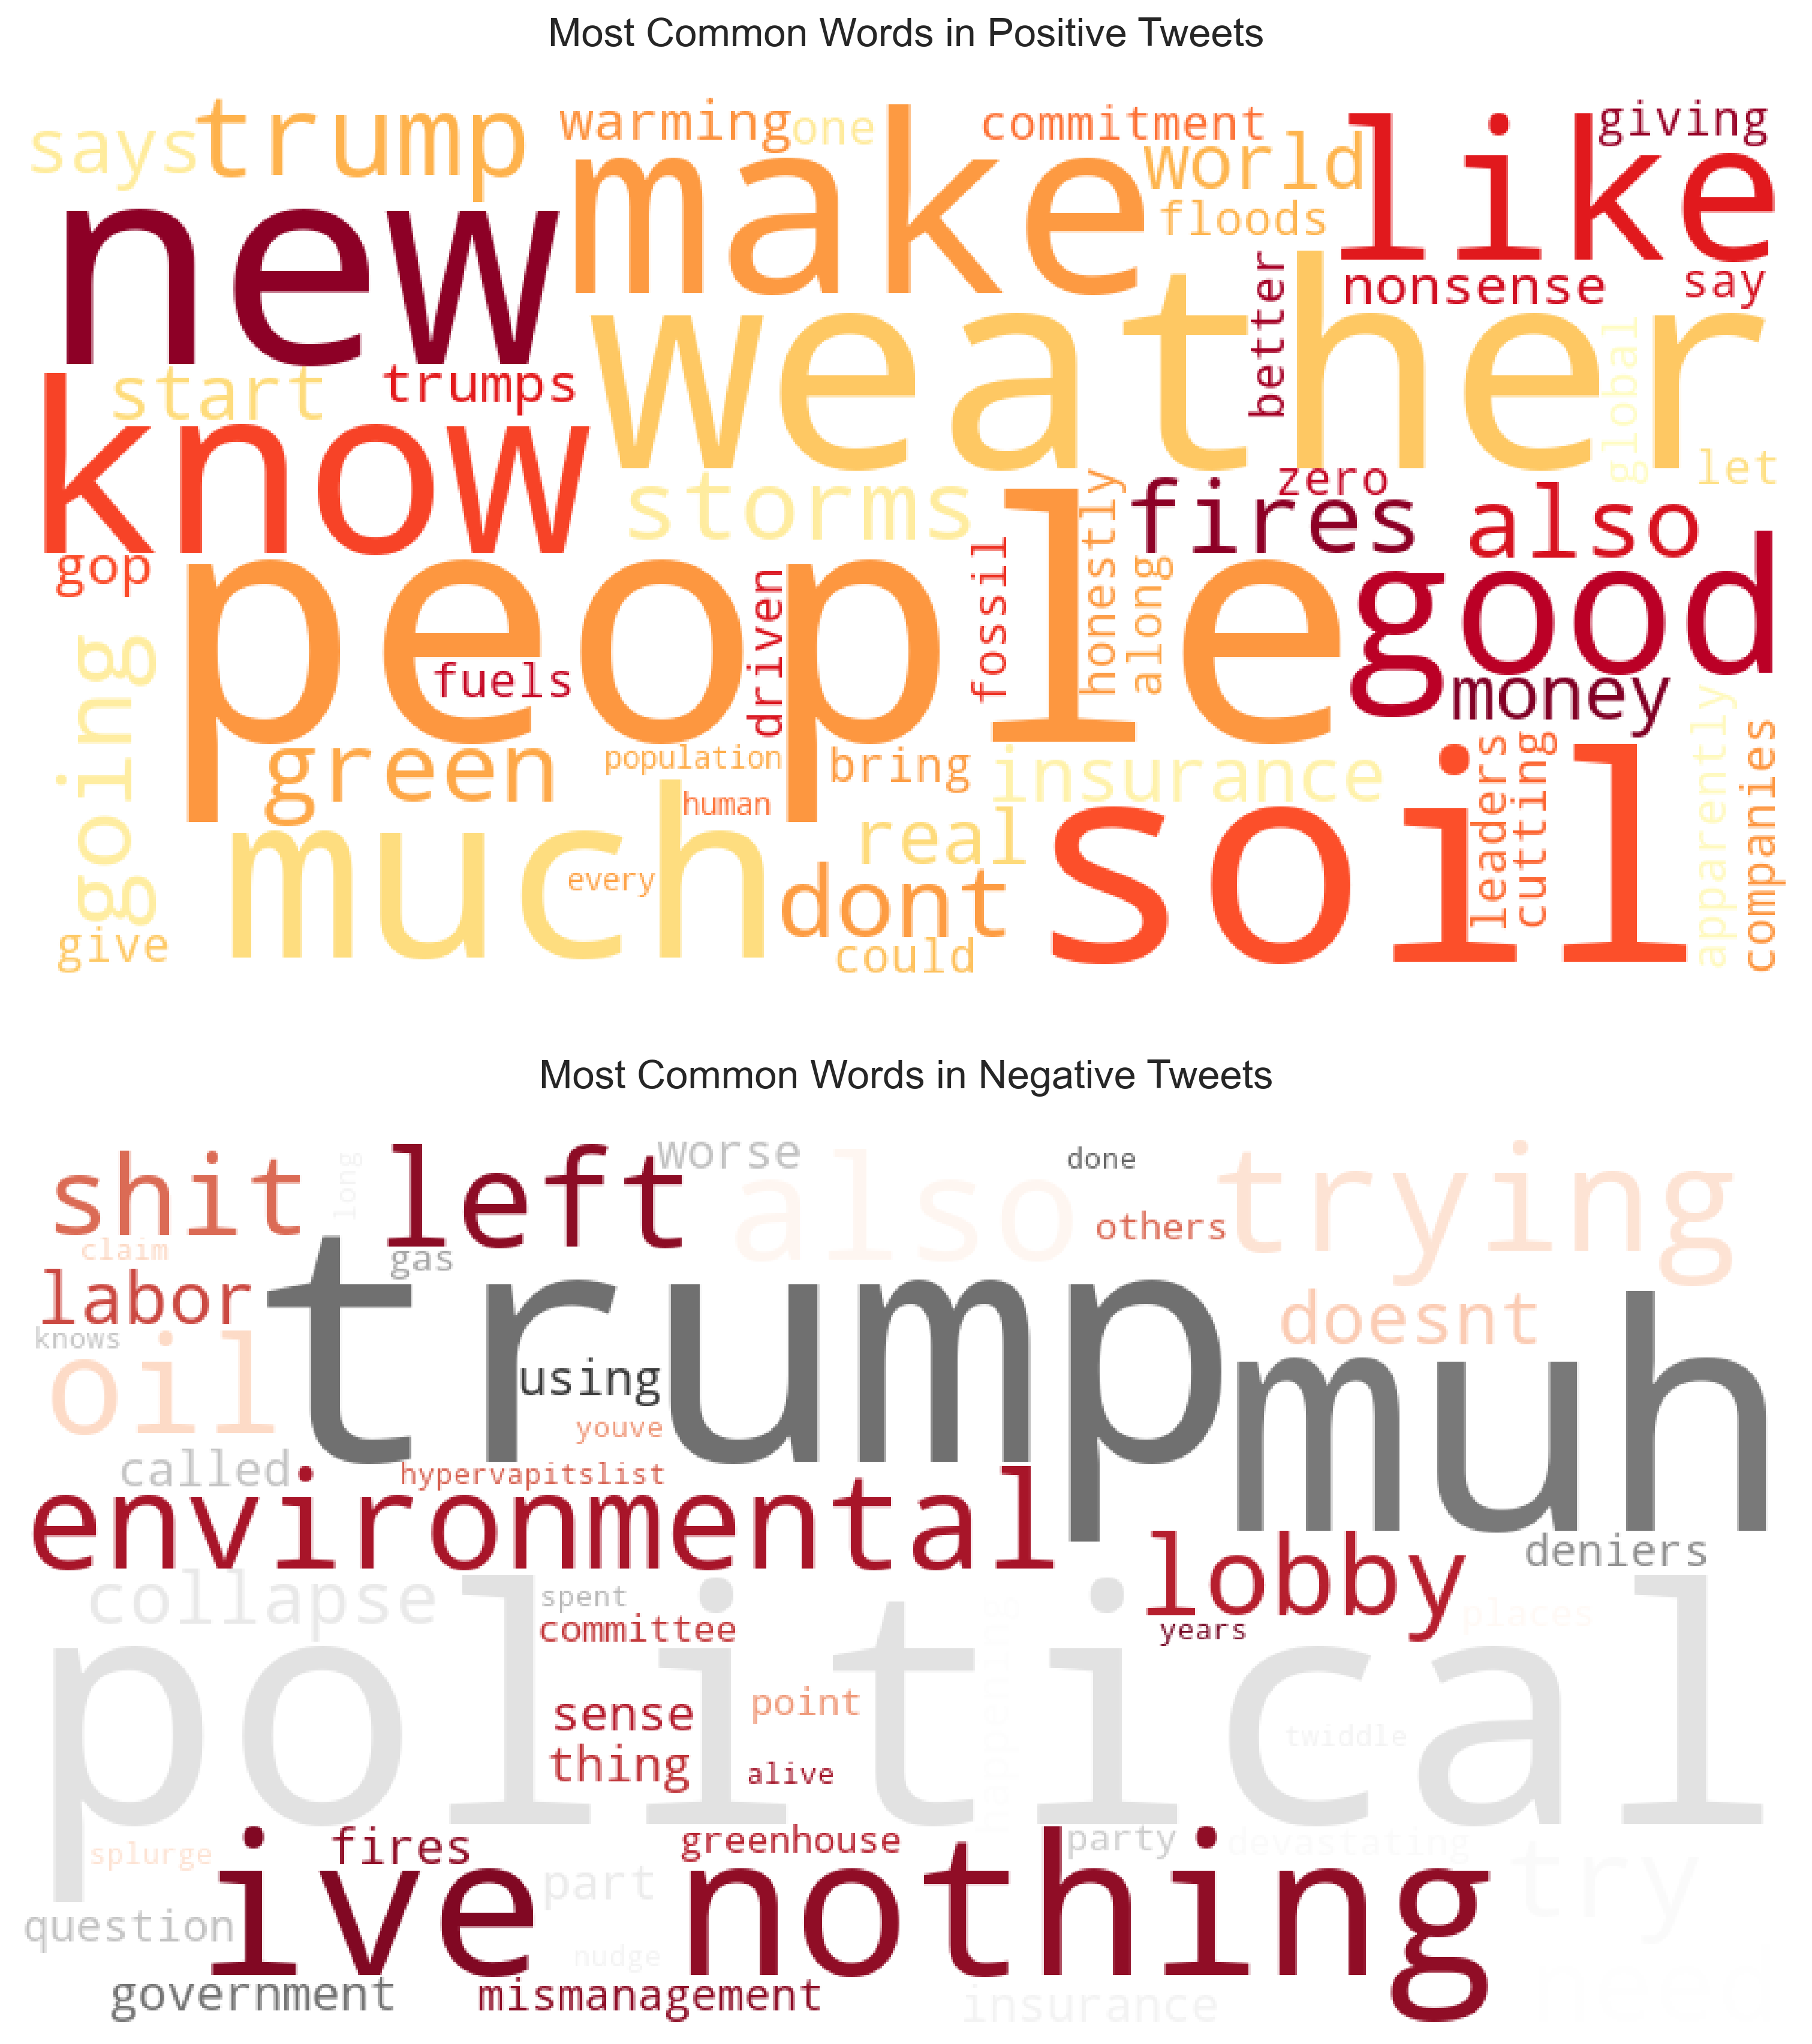

In [18]:
from IPython.display import Image
Image('sentiment_wordcloud.png')

In [24]:
import os
import pandas as pd

# Read the CSV
df = pd.read_csv('twitter_sentiment_analysis_20250129_234738.csv')

# Get path to Downloads folder (macOS)
downloads_path = os.path.expanduser("~/Downloads")

# Save to Downloads folder
df.to_csv(os.path.join(downloads_path, 'twitter_sentiment_analysis.csv'), index=False)